<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [1]:
##### Your Code Here #####
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_lg")

In [6]:
df = pd.read_csv('./data/job_listings.csv', index_col=0)

In [8]:
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


## 2) Use Spacy to tokenize / clean the listings 

In [26]:
from beautifulsoup4 import BeautifulSoup
result_df['text'] = [BeautifulSoup(text).get_text() for text in result_df['description'] ]

ModuleNotFoundError: No module named 'beautifulsoup4'

In [33]:
df['description'] = df['description'].str.replace(r'\\(x|n)[a-z0-9]{0,2}', ' ')
df['description'] = df['description'].str.replace(r'<[^<]+?>', '').str.replace(r'^b.', '')

In [35]:
df.head()

,description,title,tokens
0,Job Requirements: Conceptual understanding in ...,Data scientist,"[b""<div><div>job, requirements:</div><ul><li><..."
1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I,"[b'<div>job, description<br/>\n<br/>\n<p>as, d..."
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[b'<div><p>as, data, scientist, working, consu..."
3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[b'<div, class=""jobsearch-jobmetadataheader, i..."
4,Location: USA multiple locations 2+ years ...,Data Scientist,"[b'<ul><li>location:, usa, \xe2\x80\x93, multi..."


In [ ]:
tokens = []
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [36]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [37]:
df.head()

,description,title,tokens
0,Job Requirements: Conceptual understanding in ...,Data scientist,"[job, requirements:, conceptual, understanding..."
1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I,"[job, description, , data, scientist, 1,, hel..."
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$4,969, $6,756, monthcontractunder, general, ..."
4,Location: USA multiple locations 2+ years ...,Data Scientist,"[location:, usa, , multiple, locations, 2+..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [47]:
df.description[0]

'Job Requirements: Conceptual understanding in Machine Learning models like Nai  ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"'

In [48]:
vect = CountVectorizer(stop_words='english', min_df = 0.025, max_df= 0.95)
vect.fit(df.description)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.025,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [50]:
sparse_dtm = vect.transform(df.description)
dtm = pd.DataFrame(sparse_dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,000,10,100,12,15,20,2019,25,3rd,40,...,world,worldwide,wrangling,write,writing,written,www,year,years,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,2,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 4) Visualize the most common word counts

/home/damack/anaconda3/envs/U4S1-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


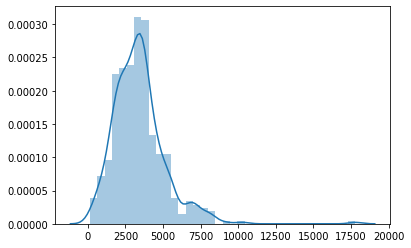

In [52]:
doc_len = [len(doc) for doc in df.description]
sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [53]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')

# Create a vocabulary and get word counts per document
sparse = tfidf.fit_transform(df.description)

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,02115,03,0356,04,05,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.106253,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [54]:
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [55]:
nn.kneighbors([dtm.iloc[0]])

(array([[0.        , 1.27849691, 1.31010879, 1.31822471, 1.31924378]]),
 array([[  0, 276, 274, 338, 366]]))

In [56]:
nn.kneighbors([dtm.iloc[1]])

(array([[0.        , 1.2574273 , 1.26695919, 1.28675327, 1.28728136]]),
 array([[  1, 201, 222, 325, 136]]))

In [57]:
ideal_ds_job = ["""Highly compensated, Work from anywhere. Bootcamp grads preferred.
                Save the children. Ladies."""]

In [58]:
new = tfidf.transform(ideal_ds_job)
nn.kneighbors(new.todense())

(array([[1.3193967 , 1.33406947, 1.34375365, 1.34980964, 1.34980964]]),
 array([[109, 379, 116, 192, 252]]))

In [59]:
df.description[109]

"Position Description The Product Catalog team is at the heart of WalmartLabs. Our applications and state of the art algorithms power the content on mobile, web, search, fulfillment, pricing, marketing technology and data analytics. There is virtually no business function that is not affected by our work. The amount of data we process is second to none. We harness this data to pursue our mission of helping hundreds of millions globally to    live better and save money   . Minimum Qualifications Bachelors Degree with 5+ years of experience or Master Degree in Computer Science/Machine Learning Established and strong data science experience in images and text processing R, Python, TensorFlow and/or related technologies Specific education in data science PhD preferred Good communication skills Ability to work with diverse team Additional Preferred Qualifications  Company Summary The Walmart eCommerce team is rapidly innovating to evolve and define the future state of shopping. As the world

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 